<a href="https://colab.research.google.com/github/elpperger/analise_dados_iniciante/blob/main/Trabalhando_planilhas_excel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importanto a biblioteca Pandas

import pandas as pd

In [ ]:
#Leitura dos arquivos no Drive
#Importante: quando se trabalha com arquivos no Drive, os dados ficam salvos no Colab.
#Importante: quando faz upload de arquivos da máquina, para trabalhar, os dados não ficam salvos.

df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [ ]:
#Para ver a estrutura do arquivo

df5.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Salvador,2018-01-01,31.06,1037,3
1,Salvador,2018-01-01,19.02,1034,3
2,Salvador,2019-02-10,173.59,1035,3
3,Salvador,2019-02-10,176.34,1037,3
4,Salvador,2019-02-14,19.47,1037,3


In [ ]:
#Como os arquivos possuem a mesma estrutura, vamos juntar os dados com o método "concat" = concatenar
#Nesse caso, estamos colocando um arquivo embaixo do outro na sequencia

df = pd.concat([df1, df2, df3, df4, df5])

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [ ]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [ ]:
#Pegar uma amostra aleatória dos dados, neste caso, 5 amostras
#sample = amostra

df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
134,Fortaleza,2019-03-02,195.18,980,5
42,Fortaleza,2019-01-01,38.71,1004,5
0,Fortaleza,2019-01-01,45.27,1002,2
118,Natal,2019-01-02,92.21,1035,2
79,Aracaju,2018-01-01,5.59,1521,4


In [ ]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [ ]:
#Como mudar o tipo do dado de uma coluna, nesse caso vamos alterar o "LojaID"
#Para isso vamos usar o método "astype"
#Nesse caso, mudamos o tipo do dado porque não iremos fazer cálculos com esse dado
#Não é obrigado a fazer isso

df["LojaID"] = df["LojaID"].astype("object")

In [ ]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [ ]:
#Como verificar se há valores nulos nos dados
#Usar o método "isnull"

df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
#Nesse caso, não tivemos valores nulos, mas se tivesse o comando para alterar os valores nulos:
#Exemplo com a coluna vendas
# o comando "fillna" indica o preenchimento dos dados nulos, que nesse caso é a média (mean)
# O comando "inplace=True", significa que eu estou passando o valor para ficar na memória

## df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)  ##

#Se eu quiser substituir todos os valores nulos por zero (0), segue o comando:

## df["Vendas"].fillna(0, inplace=True) ##

#Caso eu queira apagar as linhas com os valores nulos, segue o comando?

## df.dropna(inplace=True) ##

#Se eu quiser apagar os valores nulos apenas da coluna "Vendas", segue o comando:
#Usar o método "subset"

## df.dropna(subset=["Vendas"], inplace=True) ##

#Para remover valores nulos em todas as colunas, segue o comando:

## df.dropna(how="all", inplace=True) ##

In [ ]:
#Como criar colunas nas tabelas
#Neste caso criamos uma coluna chamada "Receitas"

df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08,196.08


In [ ]:
#Cálculo para calcular a Receita por Vendas, para mostrr a quantidade de produto vendido

df["Receita/Vendas"] = df["Receita"] / df["Vendas"]

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,196.08,8.0


In [ ]:
#Ver a maior receita

df["Receita"].max()

3544.0

In [ ]:
#Ver menor receita

df["Receita"].min()

3.34

In [ ]:
#Verificar a informação da linha inteira dos maiores resultados

df.nlargest(3, "Receitas")

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,3436.0,4.0


In [ ]:
#Verificar a informação da linha inteira dos menores resultados

df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,4.57,1.0


In [ ]:
#Fazer agrupamento das receitas, neste caso das cidades

df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [ ]:
#Ordenar do manior para o menor
#Usa-se o comando "sort_values"
#O comando "ascending" informa como deve ser ordenado

df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,3112.0,4.0


In [ ]:
############################## Aula "Trabalhando com datas" ################################################

In [ ]:
#Transformando a coluna de data em tipo inteiro

df["Data"] = df["Data"].astype("int64")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID             object
Qtde                int64
Receitas          float64
Receita           float64
Receita/Vendas    float64
dtype: object

In [ ]:
#Caso haja uma planilha com algum dado que não seja "data", o comando para transformar em data segue a seguir:
#Para isso use o comando "pd.to_datetime". neste caso a coluna "Data"

df["Data"] = pd.to_datetime(df["Data"])

In [ ]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receitas                 float64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [ ]:
#Agrupamento de receita para verificar o comportamento das vendas por ano
#Neste caso utilizamos o "dt.year" (dt = datetime e year = os anos)

df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [ ]:
#Criar a coluna de "Ano" no banco de dados

df["Ano_Venda"] = df["Data"].dt.year

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Receita,Receita/Vendas,Ano_Venda
54,Fortaleza,2019-01-01,16.73,1002,5,83.65,83.65,5.0,2019
72,Natal,2018-05-02,612.00,854,4,2448.00,2448.00,4.0,2018
235,Salvador,2019-01-03,41.84,1034,1,41.84,41.84,1.0,2019
18,Recife,2019-01-01,49.40,980,5,247.00,247.00,5.0,2019
111,Salvador,2019-03-02,147.35,1037,2,294.70,294.70,2.0,2019


In [ ]:
#Como extrair o mês e o dia da Data e criar novas colunas com o dia e mês

df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda
96,Salvador,2019-01-01,42.94,1034,3,128.82,128.82,3.0,2019,1,1
133,Natal,2019-01-02,153.71,1035,1,153.71,153.71,1.0,2019,1,2
225,Natal,2019-01-02,36.23,1035,1,36.23,36.23,1.0,2019,1,2
108,Salvador,2019-03-02,11.72,1037,1,11.72,11.72,1.0,2019,3,2
138,Fortaleza,2019-03-02,150.38,983,6,902.28,902.28,6.0,2019,3,2


In [ ]:
#Ver a data mais antiga de venda

df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [ ]:
#Como calcular a diferença de dias entre uma venda e outra

df["diferenca_dias"] = df["Data"] - df["Data"].min()

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias
116,Recife,2019-03-02,79.10,982,2,158.20,158.20,2.0,2019,3,2,425 days
31,Recife,2019-01-01,176.23,981,7,1233.61,1233.61,7.0,2019,1,1,365 days
60,Fortaleza,2019-01-01,182.14,1002,4,728.56,728.56,4.0,2019,1,1,365 days
144,Salvador,2019-01-02,23.38,1034,1,23.38,23.38,1.0,2019,1,2,366 days
159,Salvador,2019-01-02,172.52,1035,1,172.52,172.52,1.0,2019,1,2,366 days


In [ ]:
#Como calcular o trimestre de vendas

df["trimestre_venda"] = df["Data"].dt.quarter

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
30,Recife,2019-01-01,12.35,980,5,61.75,61.75,5.0,2019,1,1,365 days,1
106,Salvador,2019-01-01,149.19,1035,2,298.38,298.38,2.0,2019,1,1,365 days,1
66,Fortaleza,2019-01-01,35.11,1005,6,210.66,210.66,6.0,2019,1,1,365 days,1
127,Salvador,2019-03-02,240.61,1035,3,721.83,721.83,3.0,2019,3,2,425 days,1
62,Aracaju,2018-01-01,28.66,1520,3,85.98,85.98,3.0,2018,1,1,0 days,1


In [ ]:
#Como filtrar as vendas do ano de 2019 e do mês de março

vendas_marco_2019 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [ ]:
vendas_marco_2019

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,611.56,4.0,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,113.40,6.0,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,311.88,6.0,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,24.00,3.0,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,133.59,1.0,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,154.98,3.0,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,636.09,3.0,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,169.01,1.0,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,41.58,2.0,2019,3,2,425 days,1


In [ ]:
##############  Visualização dos dados - geração de gráficos   #################

In [ ]:
#Vendo o método "value_counts". Faz uma contagem de quantas linhas aparece a loja pelo seu "ID", isso significa que cada vez que a 
#loja aparece é porque realizou uma venda

df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

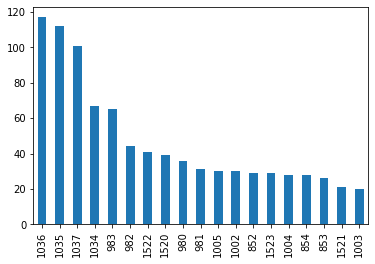

In [ ]:
#Usando a biblioteca "MatplotLib" que já faz parte do Pandas

df["LojaID"].value_counts(ascending=False).plot.bar()

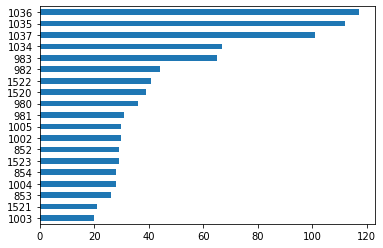

In [ ]:
#Gerando gráfico de barras horizontais

df["LojaID"].value_counts(ascending=True).plot.barh();

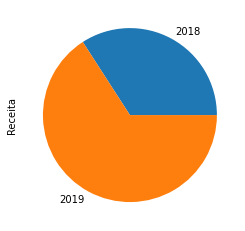

In [ ]:
#Gerando gráfico de pizza para data (ano)

df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie()

In [ ]:
#Total de vendas por cidade

df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

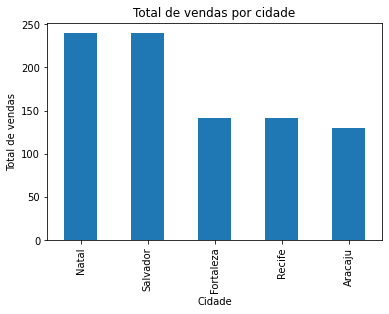

In [ ]:
#Como colocar um título no gráfico e nomear os eixos
#É preciso importar a biblioteca "pyplot"

import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total de vendas por cidade")
plt.xlabel("Cidade")
plt.ylabel("Total de vendas");

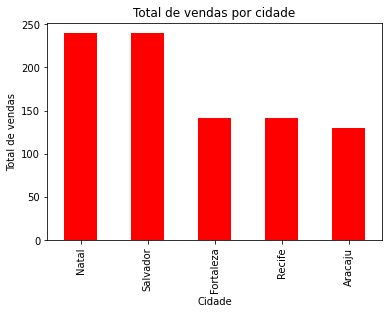

In [ ]:
#Como alterar a cor do gráfico

df["Cidade"].value_counts().plot.bar(title="Total de vendas por cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total de vendas");

In [ ]:
#Como alterar o estilo do gráfico
#Neste caso iremos utilizar o estilo "ggplot"
#No site do matplotlib há mais opções, link: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

plt.style.use("ggplot")

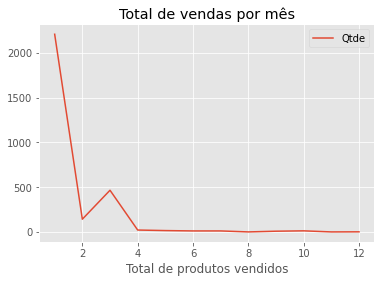

In [ ]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title="Total de vendas por mês")
plt.xlabel("Mês")
plt.xlabel("Total de produtos vendidos");
plt.legend()

In [ ]:
#Quantidade de produtos vendidos por mês

df.groupby(df["mes_venda"])["Qtde"].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [ ]:
#Selecionar apenas as vendas de 2019

df_2019 = df[df["Ano_Venda"] == 2019]

In [ ]:
#Visualizando as vendas somente de 2019

df_2019

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
7,Aracaju,2019-01-01,172.22,1522,6,1033.32,1033.32,6.0,2019,1,1,365 days,1
8,Aracaju,2019-01-01,12.16,1523,1,12.16,12.16,1.0,2019,1,1,365 days,1
9,Aracaju,2019-01-01,149.36,1523,3,448.08,448.08,3.0,2019,1,1,365 days,1
10,Aracaju,2019-01-01,42.34,1522,6,254.04,254.04,6.0,2019,1,1,365 days,1
11,Aracaju,2019-01-01,161.53,1520,4,646.12,646.12,4.0,2019,1,1,365 days,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,Salvador,2019-01-03,41.84,1034,1,41.84,41.84,1.0,2019,1,3,367 days,1
236,Salvador,2019-01-03,126.29,1035,3,378.87,378.87,3.0,2019,1,3,367 days,1
237,Salvador,2019-01-03,38.06,1036,3,114.18,114.18,3.0,2019,1,3,367 days,1
238,Salvador,2019-01-03,139.64,1035,1,139.64,139.64,1.0,2019,1,3,367 days,1


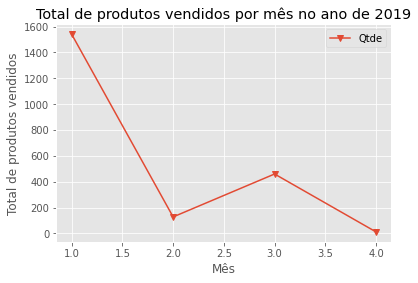

In [ ]:
#Criando o gráfico das vendas de produtos por mês, dentro do ano de 2019
#Neste gráfico acrescentamos um marcador que foi o "v", mas temos o "#", "o"

df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(title="Total de produtos vendidos por mês no ano de 2019", marker = "v")
plt.xlabel("Mês")
plt.ylabel("Total de produtos vendidos");
plt.legend()

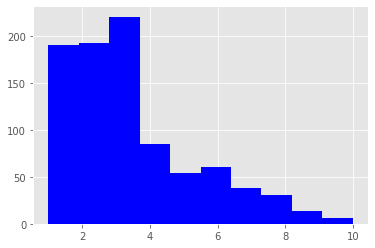

In [ ]:
#Criando um histograma com os mesmos dados do gráfico anterior
#Neste caso alteramos a cor para azul, mas há uma enorme variedade, segue link: https://matplotlib.org/2.0.2/examples/color/named_colors.html

plt.hist(df["Qtde"], color = "blue");

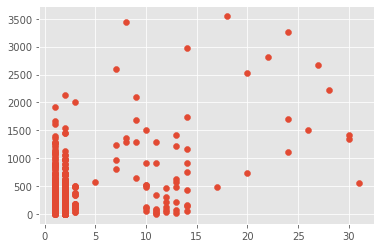

In [ ]:
#Gerando um gráfico de scatter plot

plt.scatter(x=df_2019["dia_venda"], y = df_2019["Receita"]);

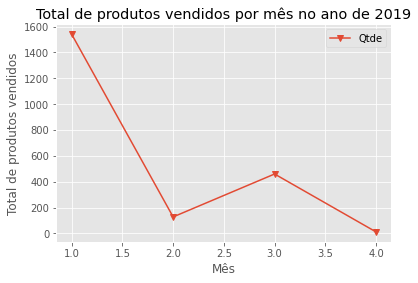

In [ ]:
#Como gerar uma imagem PNG do gráfico
#comando "plt.savefig". A imagem ficará salva na mesma pasta dos arquivos onde estão as tabelas.

df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(title="Total de produtos vendidos por mês no ano de 2019", marker = "v")
plt.xlabel("Mês")
plt.ylabel("Total de produtos vendidos");
plt.legend()
plt.savefig("grafico_qtde_prod_vend_mes.png")